In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_analytics/train.csv')

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Basic EDA


In [ ]:
# checking the unique values in Target variable
df.drop(['employee_id'],axis=1,inplace = True)

In [ ]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


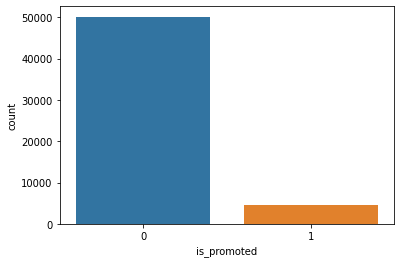

In [ ]:
#plotting the target variable

sns.countplot(x = "is_promoted",data = df)

In [ ]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
df.shape


(54808, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [ ]:
# Describe the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identify the Missing Values
df.isna().sum()


department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
DfNullper = df.apply(lambda X : np.round(100*X.isnull().sum()/df.shape[0],2))

In [ ]:
DfNullper

department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [ ]:
df['education'].mode()[0]

"Bachelor's"

In [ ]:
df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
df.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [ ]:
df['education'].fillna(df['education'].mode()[0],inplace = True)

In [ ]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(),inplace = True)

In [ ]:
ObjectCol = df.select_dtypes(include=np.object).columns
NumericalCols = df.select_dtypes(include = np.number).columns

In [ ]:
from numpy.lib.function_base import append
disceretCols = []
continousCols = []

for i in NumericalCols:
  if df[i].nunique() < 20:
    disceretCols.append(i)
  else :
    continousCols.append(i)


In [ ]:
disceretCols

['no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [ ]:
NumericalCols.shape

(8,)

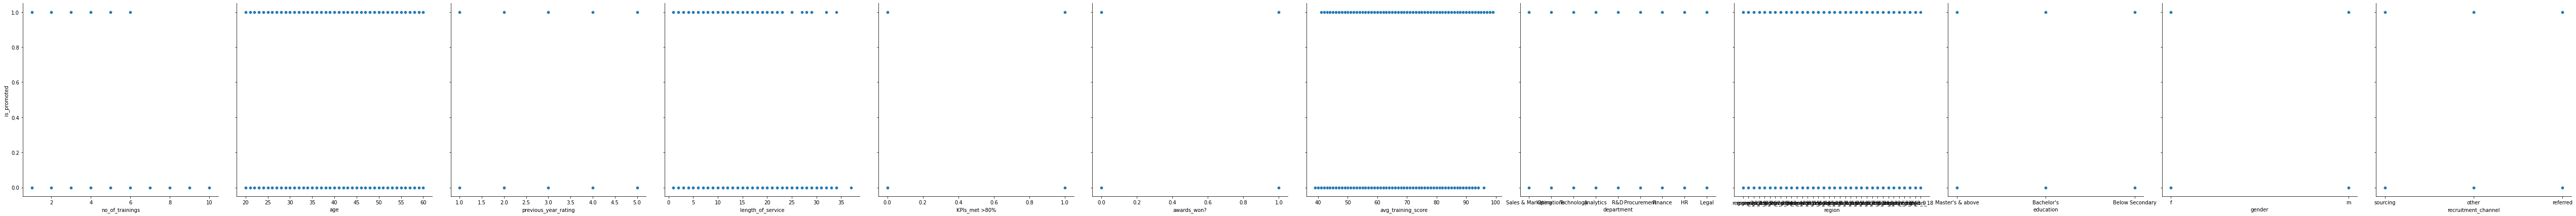

In [ ]:
sns.pairplot(df,x_vars = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 
       'department', 'region', 'education', 'gender', 'recruitment_channel'],y_vars='is_promoted',size = 6,kind = 'scatter')

## outlier Treatment

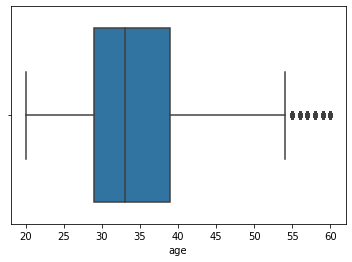

In [ ]:
sns.boxplot(df['age'])

In [ ]:
for col in df[continousCols]:
  upper_lim = df[col].mean()+df[col].std()*3
  lower_lim= df[col].mean() -df[col].std()*3

  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim
 

In [ ]:
df_Object = df[ObjectCol]
df_Object

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing


In [ ]:
from collections import defaultdict
defaultEncode = defaultdict(LabelEncoder)
fitObjectDf = df_Object.apply(lambda x : defaultEncode[x.name].fit_transform(x))

In [ ]:
df.drop(df[ObjectCol],axis = 1,inplace = True)

In [ ]:
updatedDF = pd.concat([df,fitObjectDf],axis=1) 

In [ ]:
updatedDF.info()
print(updatedDF.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       54808 non-null  int64  
 1   age                   54808 non-null  float64
 2   previous_year_rating  54808 non-null  float64
 3   length_of_service     54808 non-null  float64
 4   KPIs_met >80%         54808 non-null  int64  
 5   awards_won?           54808 non-null  int64  
 6   avg_training_score    54808 non-null  float64
 7   is_promoted           54808 non-null  int64  
 8   department            54808 non-null  int64  
 9   region                54808 non-null  int64  
 10  education             54808 non-null  int64  
 11  gender                54808 non-null  int64  
 12  recruitment_channel   54808 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 5.4 MB
Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service'

In [ ]:
corrDF = updatedDF.corr()

In [ ]:
corrDF.sum()

no_of_trainings         0.812909
age                     1.808514
previous_year_rating    1.446740
length_of_service       1.676496
KPIs_met >80%           1.462899
awards_won?             1.329201
avg_training_score      1.135755
is_promoted             1.729493
department              0.673336
region                  0.862492
education               1.652184
gender                  0.918502
recruitment_channel     0.982528
dtype: float64

In [ ]:
corrColumns = abs(corrDF['is_promoted']).sort_values(ascending = False)

In [ ]:
corrColumns

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.153230
education               0.029257
no_of_trainings         0.024896
age                     0.017169
gender                  0.011109
length_of_service       0.009620
region                  0.008841
recruitment_channel     0.002229
department              0.000130
Name: is_promoted, dtype: float64

In [ ]:
y = updatedDF['is_promoted']
X = updatedDF.drop(['is_promoted'],axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X,y)
#joblib.dump(sm,'/content/drive/MyDrive/HR_analytics/Smote.pkl')

In [ ]:
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
0,1,35.0,5.0,8.0,1,0,49.0,7,31,2,0,2
1,1,30.0,5.0,4.0,0,0,60.0,4,14,0,1,0
2,1,34.0,3.0,7.0,0,0,50.0,7,10,0,1,2
3,2,39.0,1.0,10.0,0,0,50.0,7,15,0,1,0
4,1,45.0,3.0,2.0,0,0,73.0,8,18,0,1,0


## train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.33,random_state=42)

In [ ]:
Sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(Sc_X.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(Sc_X.transform(X_test),columns = X_test.columns)

#joblib.dump(Sc_X,'/content/drive/MyDrive/HR_analytics/Scaled.pkl')

In [ ]:
# Apply all classification Algorithms


In [ ]:
#lr_clf = LogisticRegression()
#df_clf = DecisionTreeClassifier()
#rf_clf = RandomForestClassifier()
#adboost_clf = AdaBoostClassifier()
#grad_clf = GradientBoostingClassifier()
#svc_clf = SVC()
#xgb_clf = XGBClassifier()
#voting = VotingClassifier( estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier',df_clf),('Random_Forest_Classifier',rf_clf),
#                              ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf),('SVC',svc_clf),('XGBClassifier',xgb_clf)], voting='hard')
#voting.fit(X_train,y_train)


In [ ]:
y_train.value_counts()

1    33677
0    33510
Name: is_promoted, dtype: int64

In [ ]:
X_train

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
93221,2,27.455227,3.000000,1.544773,0,0,89.544773,0,14,0,1,2
10948,1,37.000000,1.000000,4.000000,0,0,62.000000,4,6,0,1,2
3445,2,30.000000,1.000000,4.000000,0,0,86.000000,0,14,0,1,2
16581,1,30.000000,1.000000,2.000000,0,0,77.000000,8,0,2,0,0
8761,1,27.000000,5.000000,2.000000,1,0,64.000000,1,31,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,4,26.000000,4.000000,1.000000,1,0,51.000000,7,24,0,1,0
54886,1,36.970257,5.000000,3.485129,1,0,56.000000,4,10,0,0,0
76820,1,46.000000,3.018937,6.018937,1,0,51.962126,7,11,0,1,0
860,3,35.000000,5.000000,3.000000,0,0,86.000000,0,6,2,1,0


In [ ]:
for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,xgb_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print("Train accuracy of",clf.__class__.__name__,clf.score(X_train,y_train))
  print("Test accuracy of ",clf.__class__.__name__,accuracy_score(y_test,y_pred))
  print("=====================================================")

# Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
adboost_clf = AdaBoostClassifier()
grad_clf = GradientBoostingClassifier()
svc_clf = SVC()
xgb_clf = XGBClassifier()

clf_list = [lr_clf,dt_clf,rf_clf,adboost_clf,grad_clf,svc_clf]
grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','mse']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]

grid_params_XGB = [{'booster':['gblinear','gbtree'],'subsample': 0.5,'choices':['depthwise', 'lossguide'],'tree_method':['hist','gpu_hist']}]

clf_params = [grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and ist hyper params are {clf_params}")
  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring = "accuracy",cv=10)
  grid_clf.fit(X_train_scaled,y_train)
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")
  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")
  print("Best params = ",grid_clf.best_params_)
  print("====================\n")



The Classifier is LogisticRegression() and ist hyper params are [[{'penalty': ['l1', 'l2'], 'solver': ['saga']}], [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}], [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10]}], [{'n_estimators': [10, 50, 250, 1000], 'learning_rate': [0.01, 0.1]}], [{'loss': ['deviance', 'exponential'], 'learning_rate': [1, 7, 9], 'criterion': ['friedman_mse', 'mse']}], [{'kernel': ['linear', 'poly', 'rbf'], 'degree': [3, 4, 5]}]]
The Train accuracy for the LogisticRegression() is 0.7121318112134788
The Test accuracy for the LogisticRegression() is 0.7177046505303236
Best params =  {'penalty': 'l1', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and ist hyper params are [[{'penalty': ['l1', 'l2'], 'solver': ['saga']}], [{'criterion': ['gini', 'entropy']

In [ ]:
# Making the Best Model - Random Forest
random_clf = RandomForestClassifier( criterion = 'gini', max_depth = 10, max_features ='sqrt', n_estimators = 9)
random_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=9)

In [ ]:
import joblib
joblib.dump(random_clf,'/content/drive/MyDrive/HR_analytics/model1.pkl')

['/content/drive/MyDrive/HR_analytics/model1.pkl']